<a href="https://colab.research.google.com/github/Idowuilekura/xai/blob/main/heartdiseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement

Heart disease describes a range of conditions that affect your heart. With growing stress, the number of cases of heart diseases are increasing rapidly.

According to the World Health Organisation(WHO), Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year. 17.9 million people die each year from CVDs, an estimated 31% of all deaths worldwide.

Hence The doctors of Health Hospital in Zastra wish to incorporate Data Science into their workings. Seeing the rising cases of heart diseases, they are specially interested in predicting the presence of heart disease in a person using some existing data. The first step they are taking towards it is to conduct a Datathon to find the best Machine Learning Engineers available out there. 

**Objective**
The idea behind this ML project is to build an ML model to determine if heart disease is present or not i.e if the target is 1 or 0. 

**Evaluation Criteria**
Submissions are evaluated using F1 Score.

Data Description
- age: Age in years
- sex: 1 = male, 0 = female
- cp: Chest pain type
- trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholesterol in mg/dl
- fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: Resting electrocardiographic results
- thalach: Maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: The slope of the peak exercise ST segment
- ca: Number of major vessels (0-3) colored by fluoroscopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
- target: 1 = Heart disease present, 0 = Heart disease not present-

Importing neccessary libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,KFold,StratifiedKFold,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow 
import tensorflow as tf 
%matplotlib inline 
!pip install catboost 
import xgboost 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',500)

loading the data and performing basic explorations

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv")

In [ ]:
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns")

The data has 212 rows and 14 columns


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [ ]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.561321,0.688679,0.915094,132.127358,247.830189,0.165094,0.537736,148.995283,0.330189,1.008491,1.448113,0.783019,2.320755,0.542453
std,9.493376,0.464130,1.008193,17.440700,53.199877,0.372144,0.527437,23.332645,0.471394,1.141681,0.601850,1.066551,0.646495,0.499374
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,151.500000,0.000000,0.650000,2.000000,0.000000,2.000000,1.000000
75%,61.250000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,165.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


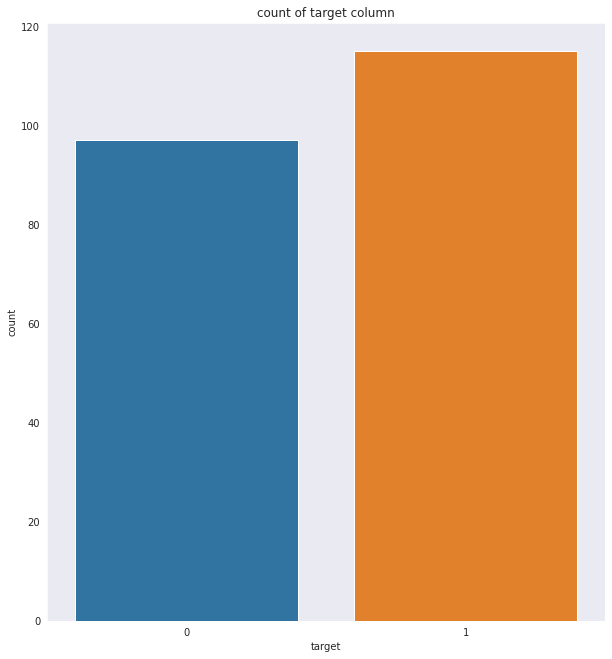

In [ ]:
#checking the target column
fig = plt.figure(figsize=(10,11))
ax = plt.subplot()
ax = sns.countplot(data['target'])
ax.set_title('count of target column')
plt.show()

In [ ]:
data.target.value_counts()/len(data)

1    0.542453
0    0.457547
Name: target, dtype: float64

From here we could see that the target seems to be balanced 

In [ ]:
mask = np.triu(data.corr())

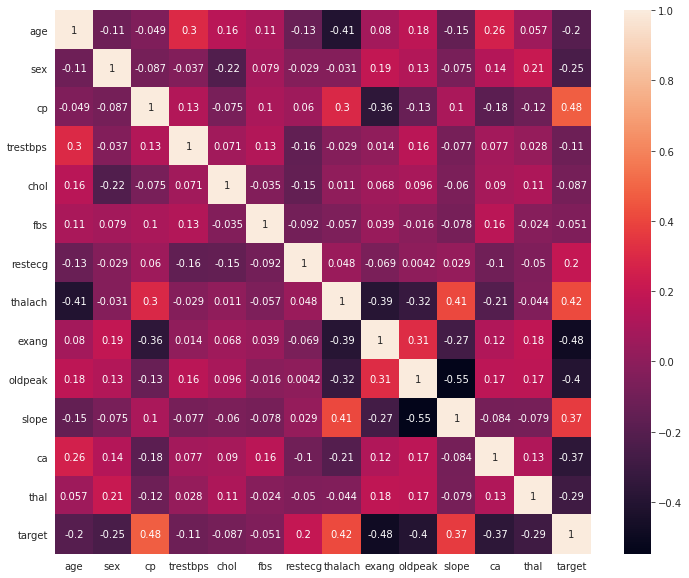

In [ ]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,fmt='.2g')
plt.show()

In [ ]:
len(data.columns)

14

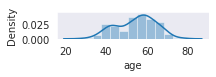

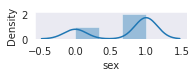

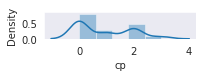

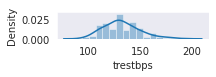

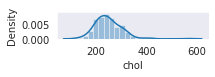

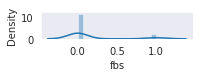

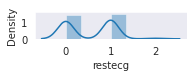

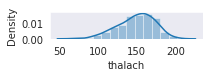

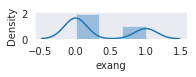

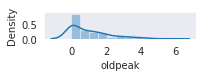

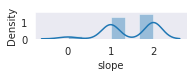

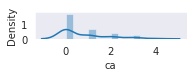

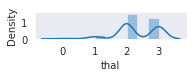

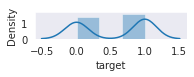

In [ ]:
for index,col in enumerate(data.columns):
  plt.subplot(7,2,index+1)
  sns.distplot(data[col])
  plt.show()

**Data preprocesing**

In [ ]:
def preprocess(data,test,train=True):
  from sklearn.preprocessing import StandardScaler
  from sklearn.model_selection import train_test_split
  sc = StandardScaler()
  if train:
    df = data
    train = df.drop('target',axis=1)
    y_label = df['target']
    train = pd.DataFrame(sc.fit_transform(train[train.columns]),columns=train.columns)
    X_train,X_test,y_train,y_test = train_test_split(train,y_label,test_size=0.3,stratify=y_label)
    return X_train,y_train,X_test,y_test
  else:
    df = test
    df = pd.DataFrame(sc.fit_transform(df[df.columns]),columns=df.columns)
    return df



In [ ]:
X_train,y_train,X_test,y_test = preprocess(data,'test',train=True)

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
92,-2.065400,0.67235,-0.909806,-0.352157,0.643811,-0.444680,-1.021939,0.300922,1.424279,-0.885429,0.919154,-0.735898,1.053145
161,1.418935,0.67235,-0.909806,0.682355,-1.033084,2.248809,0.878509,-0.343476,-0.702109,2.099685,-0.746321,1.143745,1.053145
46,-0.376025,0.67235,1.078636,-1.846451,-0.486680,-0.444680,0.878509,-0.257556,1.424279,0.168140,-0.746321,-0.735898,-0.497318
74,0.996592,0.67235,-0.909806,-0.237211,0.285822,-0.444680,0.878509,-1.890031,1.424279,-0.709834,-0.746321,0.203923,1.053145
130,1.102178,-1.48732,1.078636,1.314556,0.398872,-0.444680,0.878509,-0.042757,-0.702109,-0.183049,0.919154,-0.735898,-0.497318


In [ ]:
y_train.head()

92     0
161    0
46     1
74     1
130    1
Name: target, dtype: int64

In [ ]:
from catboost import CatBoostClassifier
cat_boost = CatBoostClassifier(n_estimators=5000,max_depth=10,reg_lambda=50,eval_metric='Logloss',random_state=20)
cat_boost.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=600,use_best_model=True)


0:	learn: 0.6856863	test: 0.6856863	test1: 0.6875914	best: 0.6875914 (0)	total: 799us	remaining: 4s
1:	learn: 0.6779785	test: 0.6779785	test1: 0.6814581	best: 0.6814581 (1)	total: 1.9ms	remaining: 4.75s
2:	learn: 0.6718590	test: 0.6718590	test1: 0.6773381	best: 0.6773381 (2)	total: 2.92ms	remaining: 4.86s
3:	learn: 0.6683028	test: 0.6683028	test1: 0.6752538	best: 0.6752538 (3)	total: 7.63ms	remaining: 9.53s
4:	learn: 0.6636051	test: 0.6636051	test1: 0.6716781	best: 0.6716781 (4)	total: 9.21ms	remaining: 9.2s
5:	learn: 0.6518525	test: 0.6518525	test1: 0.6637055	best: 0.6637055 (5)	total: 9.65ms	remaining: 8.03s
6:	learn: 0.6469167	test: 0.6469167	test1: 0.6602102	best: 0.6602102 (6)	total: 12ms	remaining: 8.55s
7:	learn: 0.6397569	test: 0.6397569	test1: 0.6549586	best: 0.6549586 (7)	total: 12.8ms	remaining: 7.96s
8:	learn: 0.6367604	test: 0.6367604	test1: 0.6529766	best: 0.6529766 (8)	total: 17.2ms	remaining: 9.53s
9:	learn: 0.6348220	test: 0.6348220	test1: 0.6524998	best: 0.6524998 (9)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,cat_boost.predict(X_test))

0.8533333333333333

In [ ]:
cat_boost.feature_importances_

array([ 4.95303002,  3.59191031, 22.00606908,  5.32162439,  4.65230477,
        0.29321997,  4.64556822,  5.85627161,  6.44030389,  9.93740412,
        4.40757765, 14.10242959, 13.79228635])

In [ ]:
test = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv")

In [ ]:
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,46,0,0,138,243,0,0,152,1,0.0,1,0,2
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2
3,44,0,2,108,141,0,1,175,0,0.6,1,0,2
4,47,1,2,108,243,0,1,152,0,0.0,2,0,2


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       91 non-null     int64  
 1   sex       91 non-null     int64  
 2   cp        91 non-null     int64  
 3   trestbps  91 non-null     int64  
 4   chol      91 non-null     int64  
 5   fbs       91 non-null     int64  
 6   restecg   91 non-null     int64  
 7   thalach   91 non-null     int64  
 8   exang     91 non-null     int64  
 9   oldpeak   91 non-null     float64
 10  slope     91 non-null     int64  
 11  ca        91 non-null     int64  
 12  thal      91 non-null     int64  
dtypes: float64(1), int64(12)
memory usage: 9.4 KB


In [ ]:
test_data = preprocess(data,test,train=False)

In [ ]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.985355,-1.425950,-1.011363,0.426365,0.007961,-0.351364,-0.969334,0.038299,1.462167,-0.925411,-0.450694,-0.671331,-0.566198
1,-1.109893,-1.425950,-1.011363,0.426365,-0.136933,-0.351364,-0.969334,0.038299,1.462167,-0.758983,-0.450694,-0.671331,-0.566198
2,0.633638,0.701287,1.777547,1.668842,0.628935,-0.351364,-0.969334,-1.199866,-0.683917,-0.925411,1.126735,-0.671331,-0.566198
3,-1.234431,-1.425950,0.847910,-1.267923,-2.103350,-0.351364,0.948262,1.093032,-0.683917,-0.426128,-0.450694,-0.671331,-0.566198
4,-0.860817,0.701287,0.847910,-1.267923,0.007961,-0.351364,0.948262,0.038299,-0.683917,-0.925411,1.126735,-0.671331,-0.566198


In [ ]:
test_pred = cat_boost.predict(test_data)

In [ ]:
sub = test_data.copy()
sub_columns = sub.columns[1:]
sub.drop(sub_columns,axis=1,inplace=True)
sub['prediction'] = test_pred

In [ ]:
sub.head()

,age,prediction
0,-0.985355,1
1,-1.109893,1
2,0.633638,1
3,-1.234431,1
4,-0.860817,1


In [ ]:
sub.drop('age',axis=1,inplace=True)

In [ ]:
sub.to_csv('dphiheartpred.csv',index=False)